# **1. SET-UP**

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/sample_data/MyDrive')

Mounted at /content/sample_data/MyDrive


In [6]:
import cv2
import imghdr
import os
import tensorflow as tf
import seaborn as sns
from matplotlib import pyplot as plt

# **2. DATA VISUALIZATION**



In [3]:
data_dir = "/content/sample_data/MyDrive/MyDrive/classification/classifier"

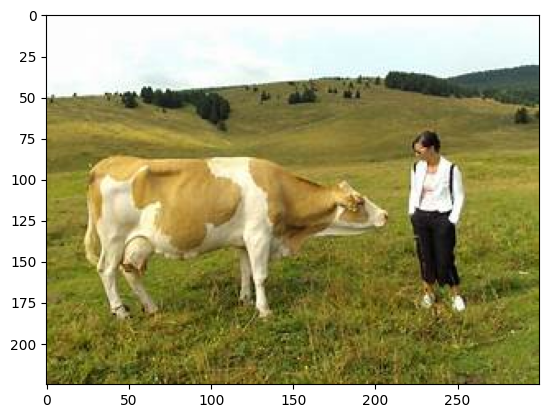

In [7]:
img = cv2.imread('/content/sample_data/MyDrive/MyDrive/classification/classifier/cow/OIP--FJF1fAEKYhaAYF7cVpHNgHaFj.jpeg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [8]:
os.listdir(data_dir)

['horse', 'sheep', 'zebra', 'dog', 'cow', 'cat']

In [9]:
img_exts = [ 'jpeg', 'png', 'bmp']

In [7]:
# for removing images with different extensions
for img_class in os.listdir(data_dir):
  for img in os.listdir(os.path.join (data_dir, img_class)):
    img_path = os.path.join(data_dir, img_class, img)
    try:
      image = cv2.imread(img_path)
      tip = imghdr.what(img_path)
      if tip not in img_exts:
        print("Image does not have required extension {}",format(img_path))
        os.remove(img_path)
    except Exception as e:
      print("Issue with image {}".format(img_path))

Image does not have required extension {} /content/sample_data/MyDrive/MyDrive/classification/classifier/zebra/1200px-Equus_zebra_-_Disney27s_Animal_Kingdom_Lodge2C_Orlando2C_Florida2C_USA_-_20100119.jpg
Image does not have required extension {} /content/sample_data/MyDrive/MyDrive/classification/classifier/zebra/800px-Plains_Zebra_Equus_quagga.jpg
Image does not have required extension {} /content/sample_data/MyDrive/MyDrive/classification/classifier/zebra/zebra-on-grass-field.jpg
Image does not have required extension {} /content/sample_data/MyDrive/MyDrive/classification/classifier/zebra/adult-plains-zebra.jpg
Image does not have required extension {} /content/sample_data/MyDrive/MyDrive/classification/classifier/zebra/International-Zebra-Day-1200x834.jpg
Image does not have required extension {} /content/sample_data/MyDrive/MyDrive/classification/classifier/zebra/two-zebras-Serengeti-National-Park-Tanzania.jpg


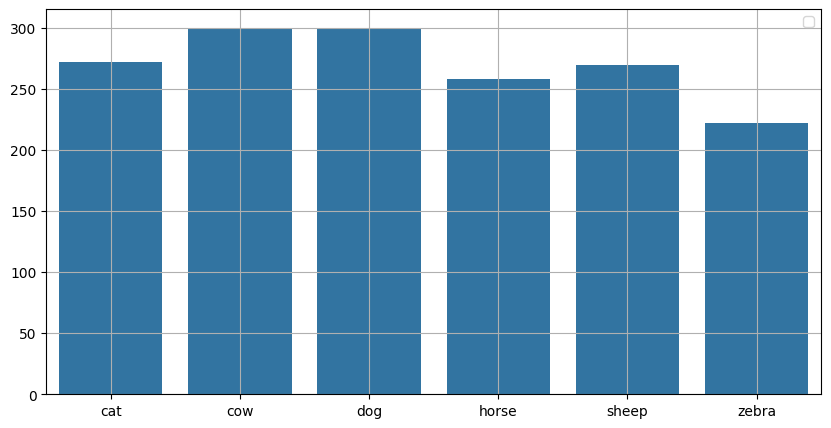

In [13]:
# for displaying no of images per class
class_names = sorted(os.listdir(data_dir))

num_classes = len(class_names)

class_sizes = []
for name in class_names:
    class_size = len(os.listdir(data_dir + "/" + name))
    class_sizes.append(class_size)

plt.figure(figsize=(10,5))
sns.barplot(x=class_names, y=class_sizes)
plt.grid()

plt.legend()

plt.show()

# **3. DATA LOADING**

In [11]:
import numpy as np

In [76]:
dataset = tf.keras.utils.image_dataset_from_directory(data_dir, label_mode='categorical')

Found 1611 files belonging to 6 classes.


In [77]:
data_iterator = dataset.as_numpy_iterator()

In [78]:
batch = data_iterator.next()

In [24]:
len(batch)

2

In [25]:
# 1 0 0 0 0 0 for cat
# 0 1 0 0 0 0 for cow
# 0 0 1 0 0 0 for dog
# 0 0 0 1 0 0 for horse
# 0 0 0 0 1 0 for sheep
# 0 0 0 0 0 1 for zebra
batch[1]

array([[0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0.

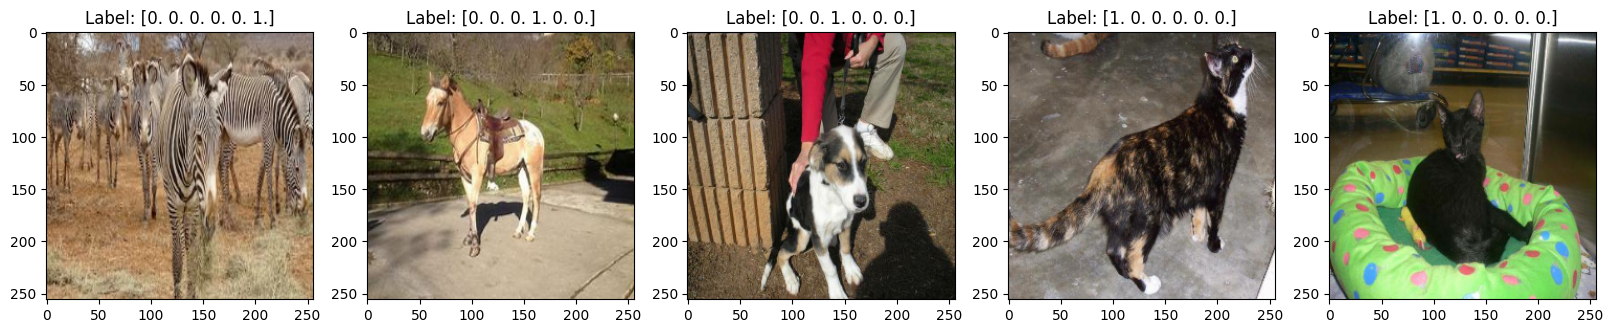

In [16]:
fig, ax = plt.subplots(ncols=5, figsize = (20,20))
for idx, img in enumerate (batch[0][:5]):
  ax[idx].imshow(img.astype(int))
  ax[idx].set_title(f'Label: {batch[1][idx]}')


# **4. DATA PRE-PROCESSING**

In [18]:
batch[0].shape

(32, 256, 256, 3)

In [20]:
batch[0].min()

0.0

In [79]:
# resizing the dataset
import tensorflow as tf

def resize_function(x, y):
    resized_x = tf.image.resize(x, (128, 128))

    return resized_x, y

# Apply the resize function to each element in the dataset
dataset = dataset.map(resize_function)


In [80]:
# Normalizing the dataset
dataset = dataset.map(lambda x,y : (x/255,y))

In [81]:
scaled_iterator = dataset.as_numpy_iterator()

In [82]:
scaled_batch = scaled_iterator.next()

In [83]:
scaled_batch[0].shape

(32, 128, 128, 3)

In [84]:
scaled_batch[0].max()

1.0

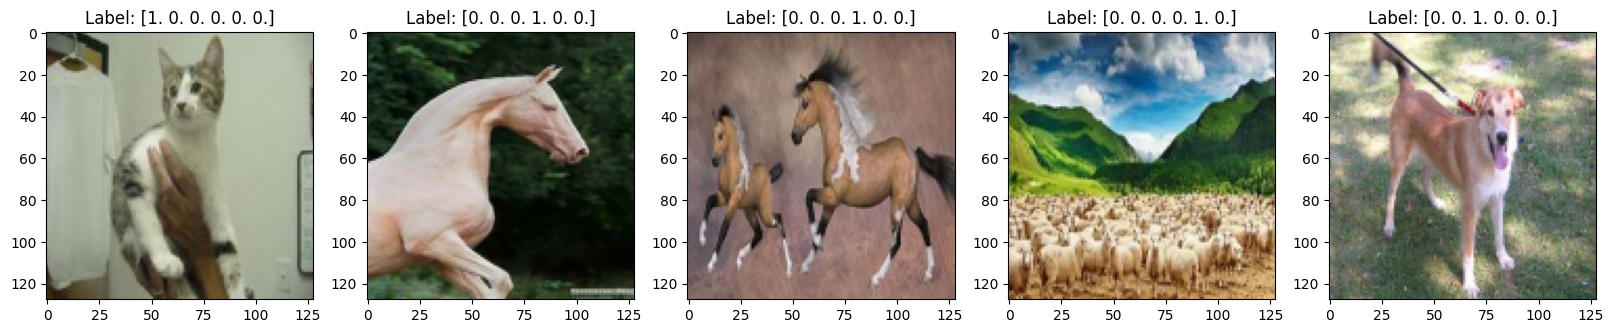

In [85]:
fig, ax = plt.subplots(ncols=5, figsize = (20,20))
for idx, img in enumerate (scaled_batch[0][:5]):
  ax[idx].imshow(img)
  ax[idx].set_title(f'Label: {scaled_batch[1][idx]}')


 Train/Test Split

In [86]:
len(dataset)

51

In [87]:
train_size = int(len(dataset)*.75)+3
test_size = int(len(dataset)*.18)+1

In [88]:
test_size+train_size

51

In [89]:
train_data = dataset.take(train_size)
test_data = dataset.skip(train_size).take(test_size)

In [90]:
def extract_features_labels(image, label):
    return image, label

x_train, y_train = zip(*train_data.map(extract_features_labels))
x_test, y_test = zip(*test_data.map(extract_features_labels))

In [91]:
x_train = tf.concat(x_train, axis=0).numpy()
y_train = tf.concat(y_train, axis=0).numpy()
x_test = tf.concat(x_test, axis=0).numpy()
y_test = tf.concat(y_test, axis=0).numpy()

In [50]:
print(y_train.shape)
print(x_train.shape)
print(y_test.shape)
print(x_test.shape)

(1312, 6)
(1312, 256, 256, 3)
(299, 6)
(299, 256, 256, 3)


# **5. Model**

In [92]:
from sklearn.neighbors import KNeighborsClassifier

In [95]:
# Reducing imahe dimesions, so that KNN accept it as an input
X_train_flat = x_train.reshape(x_train.shape[0], -1)
X_test_flat = x_test.reshape(x_test.shape[0], -1)

Using SKLEARN


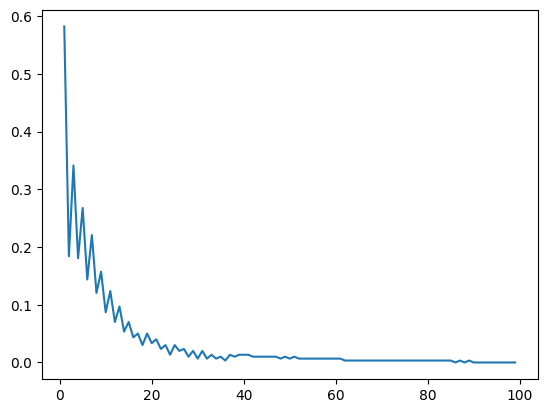

max acc at k=1 acc of 0.5819397993311036


In [101]:
# looping through values between 1-100 to find the best k value
print("Using SKLEARN")
lix = []
liy = []
index=0
acc=0
from sklearn.neighbors import KNeighborsClassifier
for k in range(1, 100):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train_flat, y_train)
    liy.append(neigh.score(X_test_flat, y_test))
    if liy[k-1]>acc:
        acc=liy[k-1]
        index=k-1
    lix.append(k)

plt.plot(lix, liy)
plt.show()
print("max acc at k="+str(index+1)+" acc of "+str(acc))

In [148]:
knn = KNeighborsClassifier(n_neighbors=1)

In [149]:
knn.fit(X_train_flat,y_train)

KNeighborsClassifier(n_neighbors=1)

In [147]:
X_train_flat.shape

(1312, 49152)

In [98]:
x_train.shape

(1312, 128, 128, 3)

# **6. Testing**

In [106]:
print("Test Accuracy: "+str(knn.score(X_test_flat, y_test)))

Test Accuracy: 0.5819397993311036


In [165]:
def Prediction(predictions):
    if np.array_equal(predictions, np.array([[1, 0, 0, 0, 0, 0]])):
        return "cat"
    elif np.array_equal(predictions, np.array([[0, 1, 0, 0, 0, 0]])):
        return "cow"
    elif np.array_equal(predictions, np.array([[0, 0, 1, 0, 0, 0]])):
        return "dog"
    elif np.array_equal(predictions, np.array([[0, 0, 0, 1, 0, 0]])):
        return "horse"
    elif np.array_equal(predictions, np.array([[0, 0, 0, 0, 1, 0]])):
        return "sheep"
    elif np.array_equal(predictions, np.array([[0, 0, 0, 0, 0, 1]])):
        return "zebra"
    else:
        return "Unidentified"


zebra


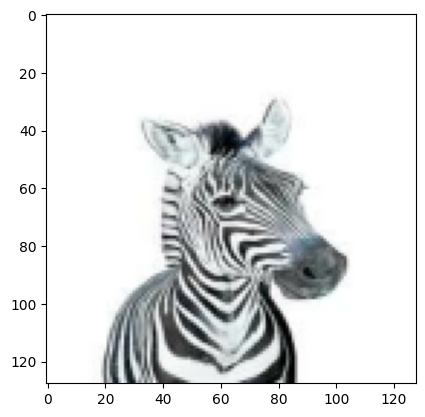

In [167]:
plt.imshow(cv2.cvtColor(x_test[5],cv2.COLOR_BGR2RGB))
yhat = knn.predict(X_test_flat[5].reshape(1,-1))
print(Prediction(yhat))

sheep


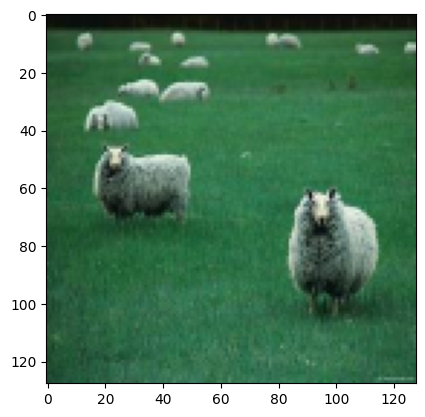

In [168]:
img = x_test[9]
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
yhat = knn.predict(img.reshape(1,-1))
print(Prediction(yhat))

sheep


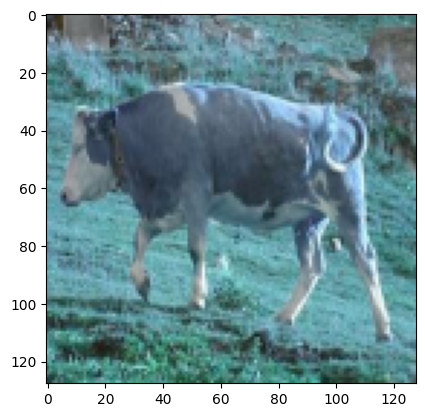

In [174]:
img = x_test[67]
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
yhat = knn.predict(img.reshape(1,-1))
print(Prediction(yhat))

dog


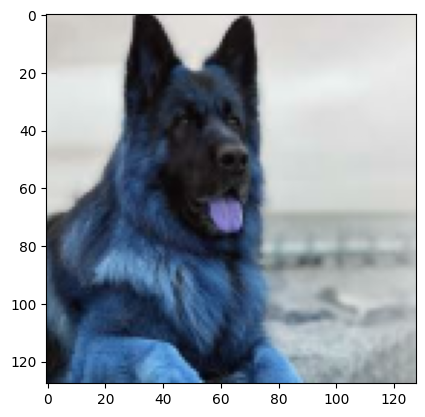

In [175]:
img = x_test[110]
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
yhat = knn.predict(img.reshape(1,-1))
print(Prediction(yhat))

# **7. Saving the Model**

In [146]:
from joblib import dump,load
model_dir = "/content/sample_data/MyDrive/MyDrive/classification/model"
dump(model_dir, "classifier_KNN.joblib")

['classifier_KNN.joblib']

The k-NN algorithm gives a testing accuracy of 58.19% for the multiclass classifier dataset. The dataset contains 5 classes

*   Cats
*   Dogs
*   Cow
*   Horse
*   Sheep
*   Zebra



